In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
def generate_colors(num):
    colors = []
    lst = list('ABCDEF0123456789')

    for i in range(num):
        colors.append('#'+''.join(np.random.choice(lst, 6)))
        
    return colors

# ----------------------------------------------------------------------
def missing_percentage(dataframe):
    """
    This function return take data frame and return data frame 
    with columns name, the number of missing values and the percentage 
    of them in each column.
    """
    total_missing = dataframe.isnull().sum().sort_values(ascending=False)
    missing_values = total_missing[total_missing.values !=0]
    missing_cols = missing_values.index
    
    missing_cols = dataframe[missing_cols].dtypes.values

    per = round((missing_values/len(dataframe))*100, 2)
    missing_df = pd.DataFrame(missing_values, columns=['Number of missing values'])
    
    return missing_df.assign(Percentage=per, Dtype=missing_cols)
#-----------------------------------------------------------------------------
def show_distribution(dataframe, col):
    fig, ax = plt.subplots(1, 2, figsize=(20,8))
    colors = generate_colors(1)
    
    sns.boxplot(data=dataframe, x=col, ax=ax[0], palette=colors)
    ax[0].set_title(f'{col.title()} Boxplot')
    
    sns.histplot(data=dataframe, x=col, ax=ax[1], color=colors, kde=True)
    ax[1].set_title(f'{col.title()} Histogram')
    
    fig.suptitle(f'{col.title()} Distribution'.replace('_', ' '), fontsize=15, color='brown')
#-----------------------------------------------------------------------------------


In [3]:
data = pd.read_csv('zomato.csv')
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

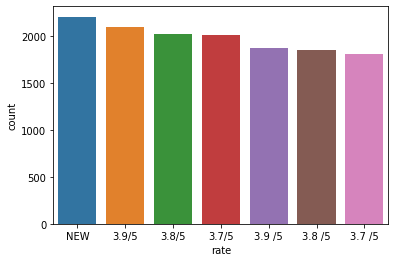

In [6]:
sns.countplot(data=data, x='rate', order=data['rate'].value_counts().index[:7])

> We can observe that the most rate is new which means that the restruant has no feedback or rate, so I will filter the data to work on the restruants only has rate.

In [7]:
data = data[data['rate']!='NEW']
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
dish_liked,26017,52.55,object
rate,7775,15.70,object
phone,1194,2.41,object
approx_cost(for two people),345,0.70,object
rest_type,225,0.45,object
cuisines,45,0.09,object
location,21,0.04,object


> We can observe that the **dish_liked** has many missing values which has 52% of data, so I will drop this column

In [9]:
# I will drop some columns because in alalysis or machine learning, I will not need these information like url, address or
# phone number, etc.
data = data.drop(['dish_liked', 'url', 'address', 'phone', 'location', 'reviews_list', 'menu_item'], axis=1)

In [10]:
data.head()

,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [11]:
# Rename columns to make it easy while using them.
data.columns = ['name', 'online_order', 'book_table', 'rate', 'votes', 'rest_type',
       'cuisines', 'cost', 'type','city']

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49509 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          49509 non-null  object
 1   online_order  49509 non-null  object
 2   book_table    49509 non-null  object
 3   rate          41734 non-null  object
 4   votes         49509 non-null  int64 
 5   rest_type     49284 non-null  object
 6   cuisines      49464 non-null  object
 7   cost          49164 non-null  object
 8   type          49509 non-null  object
 9   city          49509 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.5+ MB


#### Let's deal with missing values

In [13]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
rate,7775,15.70,object
cost,345,0.70,object
rest_type,225,0.45,object
cuisines,45,0.09,object


In [14]:
# transform rate from object to numeric and show its distribution
data['rate'] = data['rate'].str.replace('/5', '')
data['rate'] = pd.to_numeric(data['rate'], errors='coerce')

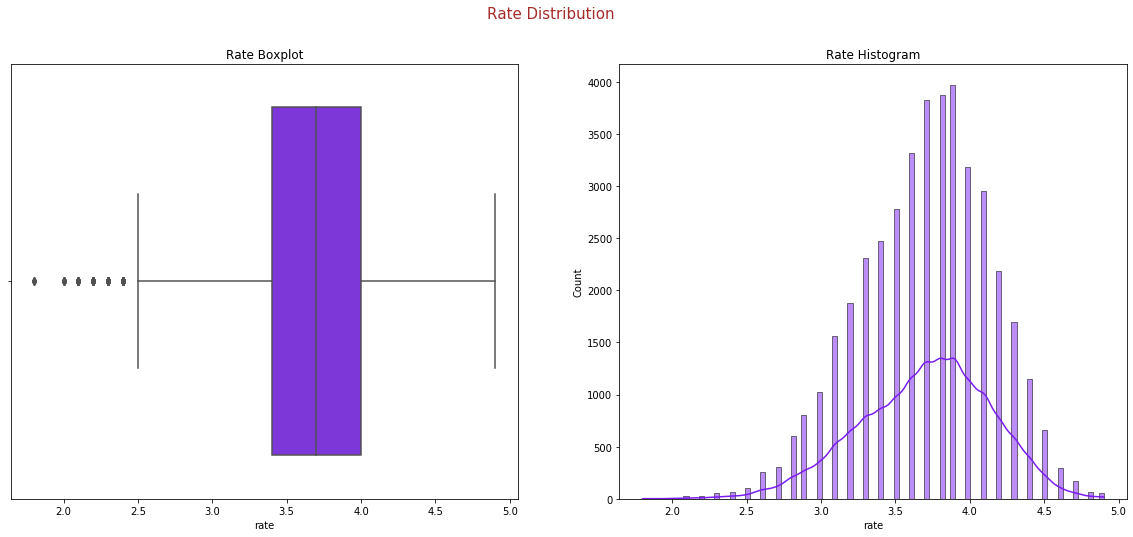

In [15]:
show_distribution(data, 'rate')

In [16]:
data['rate'].isnull().sum()

7844

In [17]:
data['rate'].describe()

count    41665.000000
mean         3.700449
std          0.440513
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [18]:
def impute(value, col):
    """This function imputes nan values by random values from the column we deal with. This way keep the distribution approximitly 
    the same"""
    x = np.random.choice(data[col].dropna())
    if math.isnan(value):
        value = x
        return value
    else:
        return value

In [19]:
data['rate'] = data['rate'].apply(lambda x: impute(x, 'rate'))

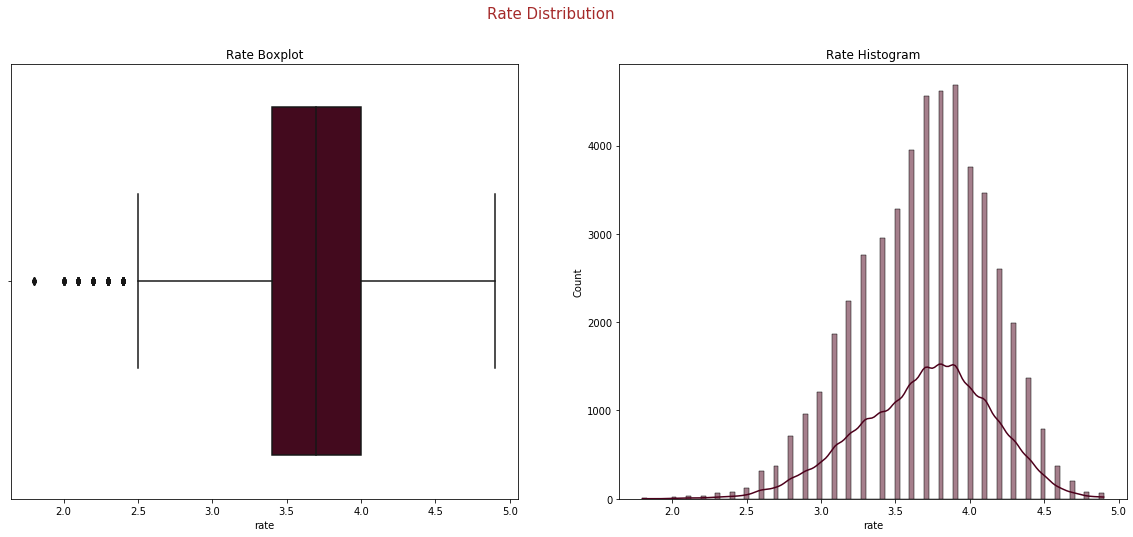

In [20]:
show_distribution(data, 'rate')

> The distributin of the **rate column** before and after imputing is approximitly the same.

In [21]:
# Transform cost from object to numeric
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

In [22]:
num_cols = data.select_dtypes(exclude='object').columns
obj_cols = data.select_dtypes(include='object').columns

In [23]:
print(f'Numerical Columns : {num_cols}', end='\n\n')
print(f'Object Columns : {obj_cols}')

Numerical Columns : Index(['rate', 'votes', 'cost'], dtype='object')

Object Columns : Index(['name', 'online_order', 'book_table', 'rest_type', 'cuisines', 'type',
       'city'],
      dtype='object')


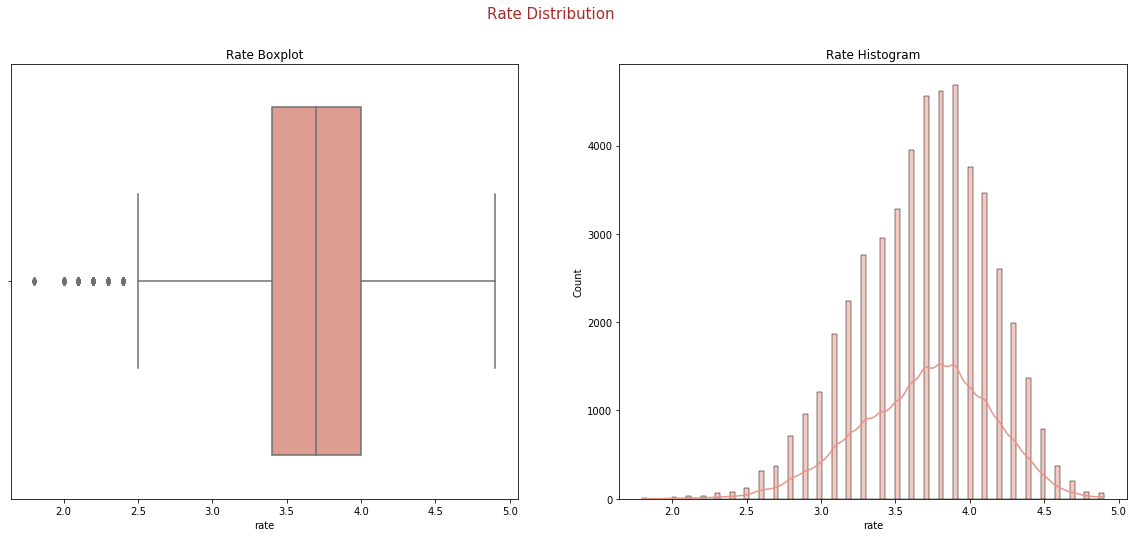

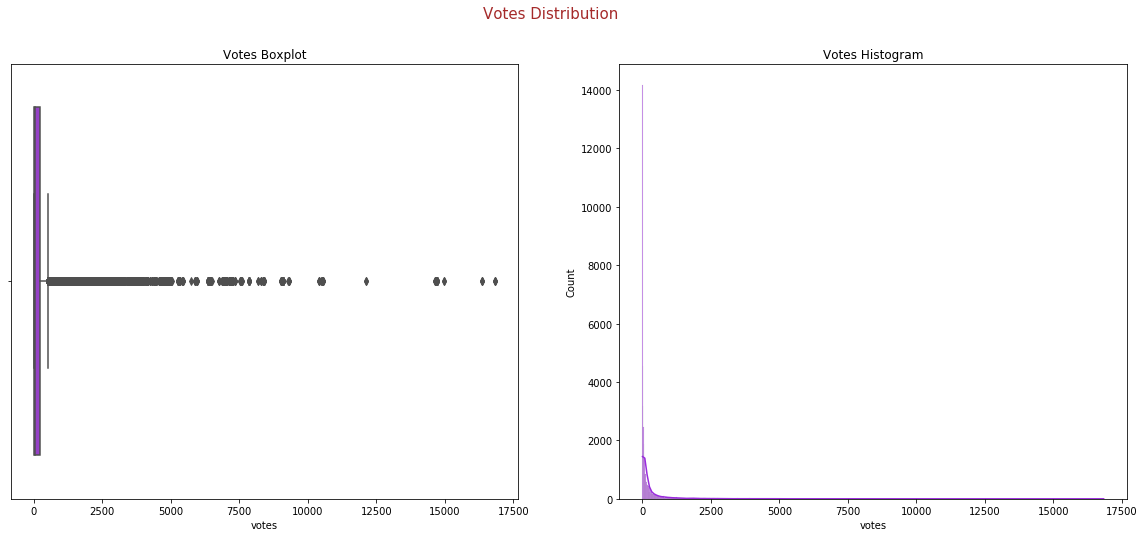

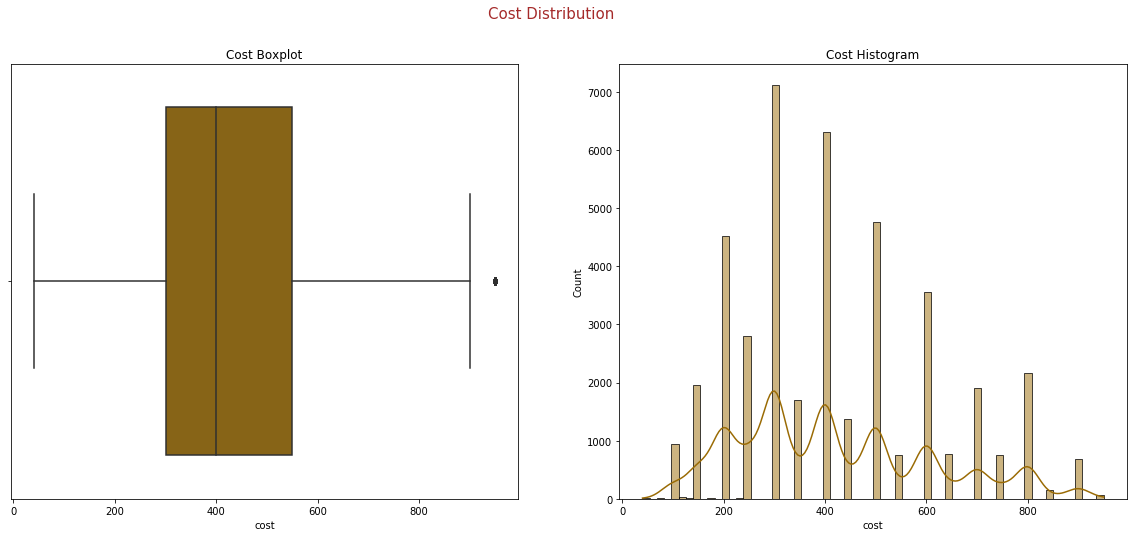

In [24]:
for i in num_cols:
    show_distribution(data, i)

In [25]:
data.describe()

,rate,votes,cost
count,49509.000000,49509.000000,42391.000000
mean,3.699319,296.349856,418.690878
std,0.441306,819.283325,194.706239
min,1.800000,0.000000,40.000000
25%,3.400000,9.000000,300.000000
50%,3.700000,46.000000,400.000000
75%,4.000000,211.000000,550.000000
max,4.900000,16832.000000,950.000000


**Notes about these plots**:
- Rate column has approximitly normal distribution
- Votes column have many outliers
- The maxium value in rate column is 4.9 and the minimum is 1.8
- The average votes is 296
- The average cost is 418 and the maxium is 950
------------- 

#### Show information about object columns

In [26]:
for i in obj_cols:
    print(f'{i} unique number : {data[i].nunique()}', end='\n\n')
    print(f'{i} unique values : {data[i].unique()}', end='\n\n')
    print(data[i].value_counts()[:10])
    print('======================================================')

name unique number : 8463

name unique values : ['Jalsa' 'Spice Elephant' 'San Churro Cafe' ... 'Nawabs Empire'
 'SeeYa Restaurant'
 'Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...']

Cafe Coffee Day      93
Onesta               85
Just Bake            72
Five Star Chicken    70
Empire Restaurant    69
Kanti Sweets         68
Baskin Robbins       63
Polar Bear           62
Petoo                62
Chef Baker's         62
Name: name, dtype: int64
online_order unique number : 2

online_order unique values : ['Yes' 'No']

Yes    29348
No     20161
Name: online_order, dtype: int64
book_table unique number : 2

book_table unique values : ['Yes' 'No']

No     43189
Yes     6320
Name: book_table, dtype: int64
rest_type unique number : 93

rest_type unique values : ['Casual Dining' 'Cafe, Casual Dining' 'Quick Bites' 'Casual Dining, Cafe'
 'Cafe' 'Quick Bites, Cafe' 'Cafe, Quick Bites' 'Delivery' 'Mess'
 'Dessert Parlor' 'Bakery, Dessert Parlor' 'Pub' 'Bakery'
 'Takeaway, Delivery' 'Fi

> We can observe that the name column has 8463 unique values and the repetition of these values are less than 1% of the data , so I will drop this column 

**Explaining**:
- Cafe Coffee Day has frequency 93 from about 25000 values

In [27]:
data = data.drop('name', axis=1)

In [28]:
# new object columns
obj_cols = ['online_order', 'book_table', 'rest_type', 'cuisines', 'type',
       'city']

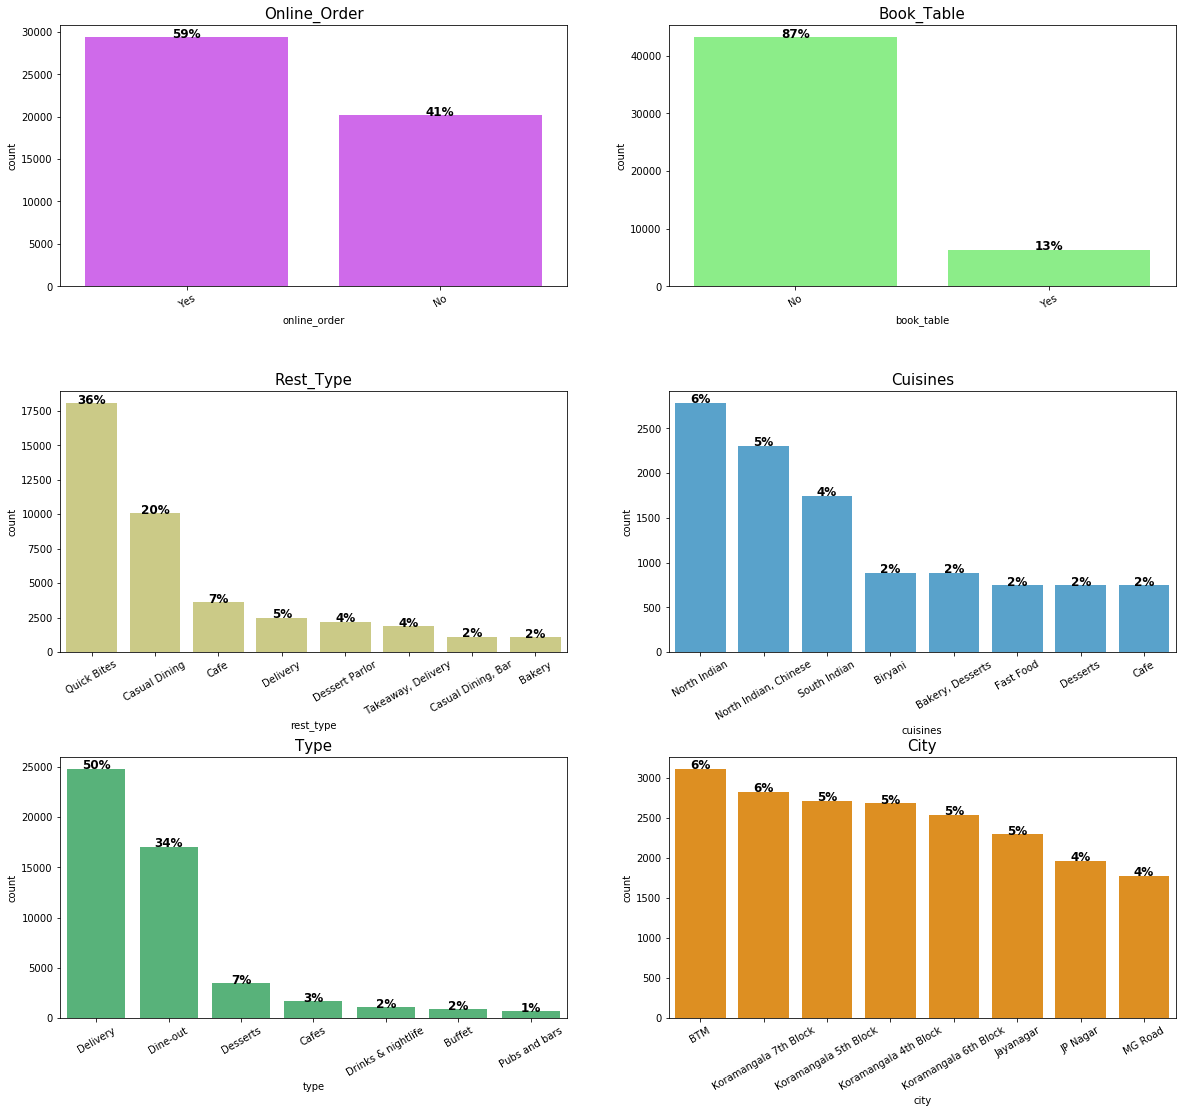

In [29]:
plt.figure(figsize=(20,25))

for i in range(len(obj_cols)):
    plt.subplot(4,2,i+1)
    ax = sns.countplot(data=data, x=obj_cols[i], order=data[obj_cols[i]].value_counts().index[:8], color=generate_colors(1)[0])
    plt.title(obj_cols[i].title(), fontsize=15)
    plt.xticks(rotation=30)
    
    for p in ax.patches:
        height=p.get_height()
        percent=(height*100)/float(len(data))
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=12)
        
plt.subplots_adjust(hspace=0.4)

**Notes about these plots:**
- 59% of restaurants accept online order
- 87% of restaurants refuse booking tables
- Most restaurants type in our data are **quick bites which has 36%** from this data, and **Casual Dining which has 20%** 
- Mos cuisines popular served by restaurant are **North Indian, Chinese and South Indian**
- Most popular categories of restaurants are **delivery which has 50% of frequency, and dine-out which has 34%**
-----------

**Next steps**:
- rest_type column has to be more cleaned (has 93 unique values, we can replace some values of them by 'other')
- imputing missing values

In [30]:
missing_percentage(data)

,Number of missing values,Percentage,Dtype
cost,7118,14.38,float64
rest_type,225,0.45,object
cuisines,45,0.09,object


In [31]:
data['cost'] = data['cost'].apply(lambda x: impute(x, 'cost'))

In [32]:
data['rest_type'] = data['rest_type'].fillna(data['rest_type'].mode()[0])
data['cuisines'] = data['cuisines'].fillna(data['cuisines'].mode()[0])

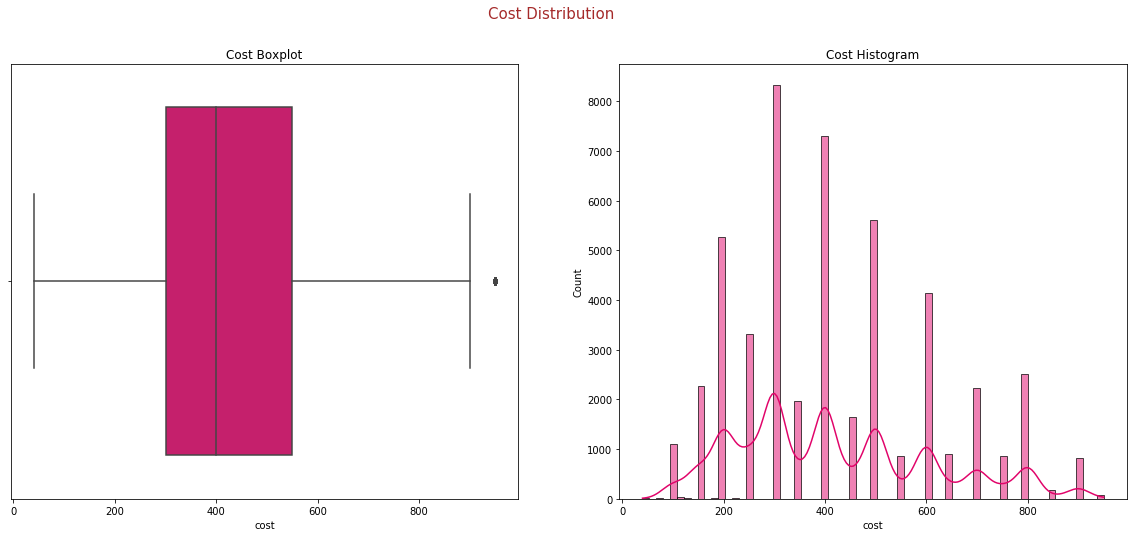

In [33]:
show_distribution(data, 'cost')

> The cost column still have approximitly the same distribution after imputing.

### Some Questions & Answers

#### 1- what is the relation between cost and cuisines differences?

In [34]:
keys = list(data['cuisines'].unique())
dic = {}
for k in keys:
    dic[k] = data[data['cuisines']==k]['cost'].median()

In [35]:
d = {}
i = 0
for key, value in dic.items():
    d[key] = value
    i+=1
    if i == 10:
        break

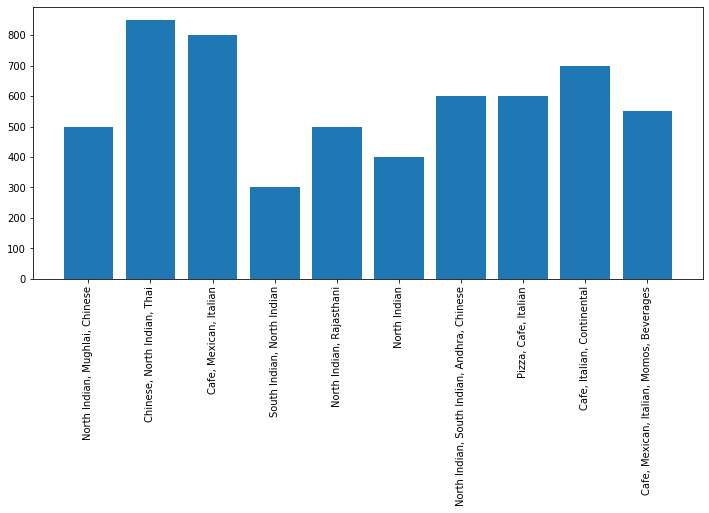

In [36]:
plt.figure(figsize=(12,5))
keys = d.keys()
values = d.values()

plt.bar(keys, values);
plt.xticks(rotation=90);

we can observe that there is no rule for that because some restaurants serve different types of cuisines but there cost are different because there are other effects

In [37]:
counts = data['cuisines'].value_counts()
idx = counts[counts.lt(100)].index

#val = data['cuisines'].value_counts()[data['cuisines'].value_counts(normalize=True)*100<1.00].index

data.loc[data['cuisines'].isin(idx), 'cuisines'] = 'Others'

In [38]:
data['cuisines'].value_counts()

Others                            25696
North Indian                       2825
North Indian, Chinese              2307
South Indian                       1747
Bakery, Desserts                    886
                                  ...  
Chinese, Thai, Momos                110
Cafe, Bakery                        110
Beverages, Desserts                 106
Italian, Pizza                      105
North Indian, Mughlai, Chinese      102
Name: cuisines, Length: 67, dtype: int64

#### 2-  Is booking table service affecting on rate of the restaurant ?

Text(0.5, 1.0, 'Booking Table & Rate')

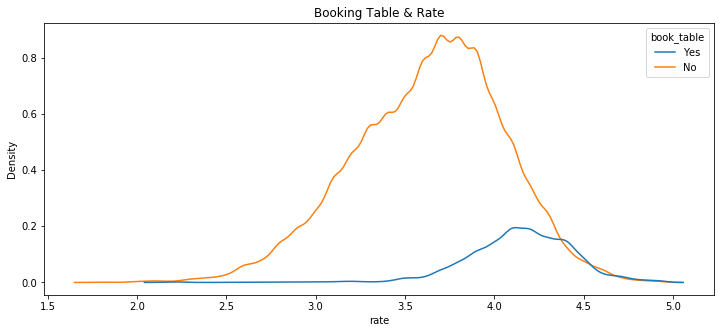

In [47]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=data, x='rate', hue='book_table');
plt.title('Booking Table & Rate')

Yes, the booking table service affects on the rate. We can observe the peak of no curve is in range 3.5 to 4 while the peak of yes curve is in range 4 to 4.5
<hr></hr>

><font color='blue'>**Advice**: Add booking service will increase your rating</font>

#### 3-  Relationship between online order and rating of the restaurant

Text(0.5, 1.0, 'Online Order & Rate')

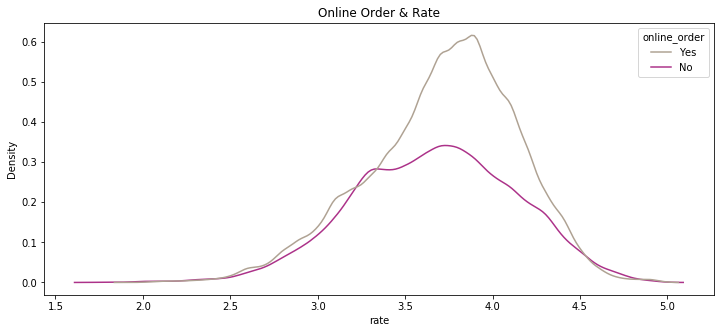

In [50]:
plt.figure(figsize=(12,5))
sns.kdeplot(data=data, x='rate', hue='online_order', palette=generate_colors(2));
plt.title('Online Order & Rate')

The distribution of two curves are approximitly the same but the peak value is slight different. In restaurants which have online order service have more high rates

#### 4-  Is cost different from city to another?

<Figure size 864x360 with 0 Axes>

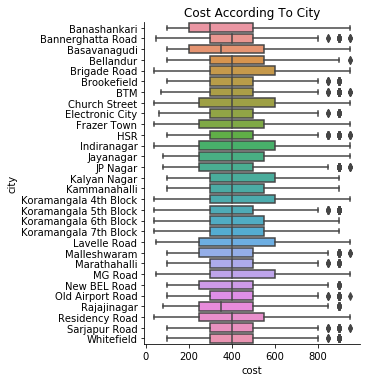

In [71]:
plt.figure(figsize=(12,5))
sns.catplot(data=data, x='cost', y='city', kind='box');
plt.title('Cost According To City');

> There are aproximitly the same cost

#### 5- Rest type and highest votes

In [82]:
# filtering the most popular rest types
new = data[data['rest_type'].isin(list(data['rest_type'].value_counts().index[:5]))]
new.head(3)

,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,Others,800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari


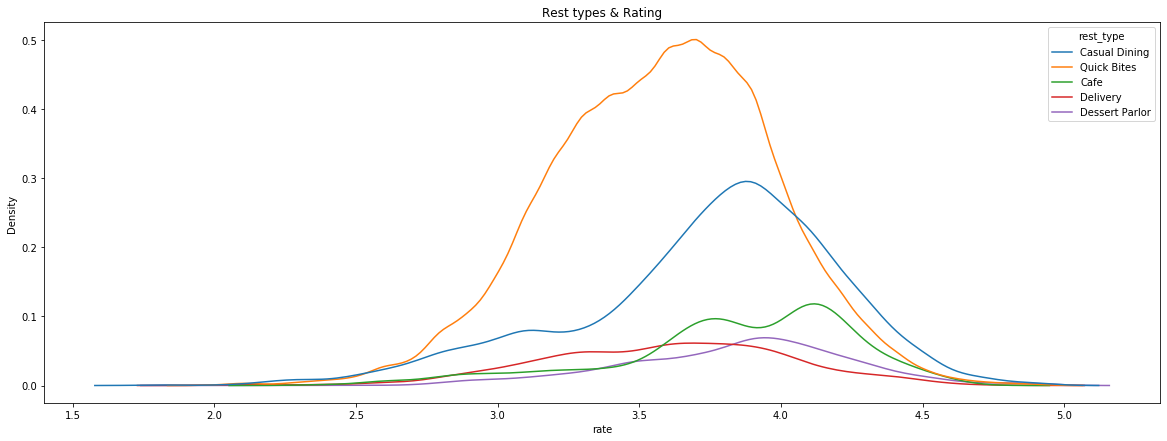

In [84]:
plt.figure(figsize=(20,7))
sns.kdeplot(data=new, x='rate', hue='rest_type');
plt.title('Rest types & Rating');

> **The hightest rate is for cafe**. 

> **The second hightest are  dessert palor and casual dining**

##                 

### Apply Machine Learning Algorithms

we can apply both classification and regression on this data. 
**Regression**: we will predict the votes
**Classification**: we will predict the the service is good (1) or bad (0) according to the rate.

### With Regression Problem

In [85]:
data.head()

,online_order,book_table,rate,votes,rest_type,cuisines,cost,type,city
0,Yes,Yes,4.1,775,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Yes,No,4.1,787,Casual Dining,Others,800.0,Buffet,Banashankari
2,Yes,No,3.8,918,"Cafe, Casual Dining",Others,800.0,Buffet,Banashankari
3,No,No,3.7,88,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,No,No,3.8,166,Casual Dining,Others,600.0,Buffet,Banashankari


In [86]:
x = data.drop('rate', axis=1)
y = data['rate']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42, test_size=0.2)

In [87]:
oe = OrdinalEncoder()
x_train[obj_cols] = oe.fit_transform(x_train[obj_cols])
x_valid[obj_cols] = oe.transform(x_valid[obj_cols])

In [88]:
x_train.head()

,online_order,book_table,votes,rest_type,cuisines,cost,type,city
36655,0.0,0.0,68,53.0,39.0,550.0,4.0,19.0
22671,1.0,0.0,19,91.0,12.0,200.0,2.0,12.0
3334,0.0,0.0,55,58.0,57.0,300.0,4.0,3.0
48938,1.0,0.0,25,78.0,45.0,400.0,2.0,28.0
51226,0.0,0.0,0,78.0,21.0,400.0,4.0,29.0


In [89]:
def apply_algorithm(algo):
    model = algo
    model.fit(x_train, y_train)

    print(f'Training Score : {model.score(x_train, y_train)}')
    print(f'Validation Score : {model.score(x_valid, y_valid)}')

    y_pred = model.predict(x_valid)
    print(np.sqrt(mean_squared_error(y_valid, y_pred)))

In [90]:
apply_algorithm(LinearRegression())

Training Score : 0.22313220867918637
Validation Score : 0.22752790624417374
0.3872431642922473


In [91]:
apply_algorithm(RandomForestRegressor())

Training Score : 0.9303035717523769
Validation Score : 0.653859897159538
0.2592198887317638


In [92]:
apply_algorithm(RandomForestRegressor(n_estimators=10))

Training Score : 0.9100028564273844
Validation Score : 0.6194278049466484
0.27180715714540404


In [93]:
apply_algorithm(DecisionTreeRegressor())

Training Score : 0.969573167886864
Validation Score : 0.45082919342016725
0.32650969551019016


In [94]:
apply_algorithm(DecisionTreeRegressor(max_depth=25))

Training Score : 0.9391675714837571
Validation Score : 0.4549026276487106
0.32529651077164834


###            

### With Classificaiton Problem

In [95]:
data['rate'].describe()

count    49509.000000
mean         3.699319
std          0.441306
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

In [97]:
def classify(value):
    if value >= 3.7:
        return 1 # service is good
    else:
        return 0 # service is bad

In [98]:
data['classify'] = data['rate'].apply(classify)
data['classify'].value_counts()

1    28552
0    20957
Name: classify, dtype: int64

In [99]:
x = data.drop(['rate', 'classify'], axis=1)
y = data['classify']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, random_state=42, test_size=0.2)

In [100]:
oe = OrdinalEncoder()
x_train[obj_cols] = oe.fit_transform(x_train[obj_cols])
x_valid[obj_cols] = oe.transform(x_valid[obj_cols])

In [101]:
x_train.head()

,online_order,book_table,votes,rest_type,cuisines,cost,type,city
36655,0.0,0.0,68,53.0,39.0,550.0,4.0,19.0
22671,1.0,0.0,19,91.0,12.0,200.0,2.0,12.0
3334,0.0,0.0,55,58.0,57.0,300.0,4.0,3.0
48938,1.0,0.0,25,78.0,45.0,400.0,2.0,28.0
51226,0.0,0.0,0,78.0,21.0,400.0,4.0,29.0


In [102]:
apply_algorithm(LogisticRegression())

Training Score : 0.7137122225869165
Validation Score : 0.7156130074732377
0.5332794694405197


In [103]:
apply_algorithm(RandomForestClassifier())

Training Score : 0.9864922867169945
Validation Score : 0.8442738840638255
0.39462148438240724


In [104]:
apply_algorithm(DecisionTreeClassifier())

Training Score : 0.9864922867169945
Validation Score : 0.8536659260755403
0.3825363694140202
